<a href="https://colab.research.google.com/github/terra2n/2025_KB_TI-1C/blob/main/jobsheet7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Pre-processing

## Latihan

### 1. Data preparation dengan One Hot Encoding

In [37]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [38]:
# membuat data array gender
gender = ['perempuan', 'laki-laki', 'laki-laki', 'perempuan', 'perempuan']
# membuat data frame dari data gender
df = pd.DataFrame({'gender': gender})

In [39]:
# membuat instance dari OneHotEncoder
encoder = OneHotEncoder()
# melakukan encoding pada data frame
encoded_df = pd.DataFrame(encoder.fit_transform(df[['gender']]).toarray(), columns=encoder.get_feature_names_out(['gender']))

In [40]:
# menggabungkan data frame yang sudah di-encode dengan data frame awal
df.encoded = pd.concat([df, encoded_df], axis=1)
# menampilkan hasil
df.encoded

<ipython-input-40-1e09bc462b4e>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.encoded = pd.concat([df, encoded_df], axis=1)


,gender,gender_laki-laki,gender_perempuan
0,perempuan,0.0,1.0
1,laki-laki,1.0,0.0
2,laki-laki,1.0,0.0
3,perempuan,0.0,1.0
4,perempuan,0.0,1.0


### 2. Data Preparation dengan Outlier Removal

In [41]:
import pandas as pd
import numpy as np

In [42]:
# membuat data frame contoh
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'B': [15, 20, 25, 30, 35, 40, 45, 50, 55, 500]
})

In [43]:
# mencari nilai z-score untuk setiap data point pada kolom B
z_scores = np.abs((df['B'] - df['B'].mean()) / df['B'].std())
# menghilangkan data point yang memiliki z-score lebih besar dari 3
df_clean = df.loc[round(z_scores) < 3]
# menampilkan data frame yang tela di-clean
print(df_clean)

   A   B
0  1  15
1  2  20
2  3  25
3  4  30
4  5  35
5  6  40
6  7  45
7  8  50
8  9  55


### 3. Data Preparation dengan Normalization

In [44]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [45]:
# membuat data frame contoh
df = pd.DataFrame({
    'Nama': ['Andi', 'Budi', 'Cindy', 'Diana', 'Eka', 'lala'],
    'Gaji': [3000000, 5000000, 7000000, 9000000, 11000000, 9000000],
    'Umur': [25, 30, 35, 40, 45, 30]
})

In [46]:
# normalisasi data gaji dan umur menggunakan MinMaxScaler
scaler = MinMaxScaler()
df[['Gaji', 'Umur']] = scaler.fit_transform(df[['Gaji', 'Umur']])
# menampilkan data frame hasil normalisasi
df

,Nama,Gaji,Umur
0,Andi,0.00,0.00
1,Budi,0.25,0.25
2,Cindy,0.50,0.50
3,Diana,0.75,0.75
4,Eka,1.00,1.00
5,lala,0.75,0.25


### 4. Data Preparation dengan Standarization

In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [48]:
# membuat data frame contoh
df =pd.DataFrame({
    'Nama': ['Andi', 'Budi', 'Cindy', 'Diana', 'Eka', 'lala'],
    'Gaji': [3000000, 5000000, 7000000, 9000000, 11000000, 9000000],
    'Umur': [25, 30, 35, 40, 45, 30]
})

In [49]:
# normalisasi data gaji dan umut menggunakan StandardScaler
scaler = StandardScaler()
df[['Gaji', 'Umur']] = scaler.fit_transform(df[['Gaji', 'Umur']])
# menampilkan data frame hasil normalisasi
df

,Nama,Gaji,Umur
0,Andi,-1.612452,-1.364382
1,Budi,-0.868243,-0.620174
2,Cindy,-0.124035,0.124035
3,Diana,0.620174,0.868243
4,Eka,1.364382,1.612452
5,lala,0.620174,-0.620174


### 5. Pembuatan DataSet

In [50]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [51]:
# membuat data frmae contoh
df = pd.DataFrame({
    'X': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Y': [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
})

In [52]:
# membagi data menjadi data latih dan data uji dengan rasio 80:20
x_train, x_test, y_train, y_test = train_test_split(df['X'], df['Y'], test_size=0.2, random_state=42)

In [53]:
# menampilkan data latih
print('Data Latih')
print('x_train:', x_train)
print('y_train:', y_train)

# menampilkan data uji
print('\nData Uji')
print('x_test:', x_test)
print('y_test:', y_test)

Data Latih
x_train: 5     6
0     1
7     8
2     3
9    10
4     5
3     4
6     7
Name: X, dtype: int64
y_train: 5    40
0    15
7    50
2    25
9    60
4    35
3    30
6    45
Name: Y, dtype: int64

Data Uji
x_test: 8    9
1    2
Name: X, dtype: int64
y_test: 8    55
1    20
Name: Y, dtype: int64


#### Implementasi Pembagian data pada data heart.csv

In [54]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Import data heart.csv
df = pd.read_csv('heart.csv');
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [55]:
# ambil 13 data dan masukan kedalam variabel data
data = df.iloc[:, :13]
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [56]:
# Rubah data ke array
data = data.values
data

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [57]:
# Masukan data pada kolom terakhir dan masukan kedalam variabel label
label = df.iloc[:, -1]

In [58]:
# Rubah data ke array
label = label.values
label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [59]:
# Bagi data menjadi data training dan data testing
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=0.2, random_state=42)

print('Ukuran data latih:', data_train.shape)
print('Ukuran data uji:', data_test.shape)

Ukuran data latih: (242, 13)
Ukuran data uji: (61, 13)


### Cross Validation

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [61]:
# membuat model Decision Tree
dt = DecisionTreeClassifier()

# melakukan 5-fold cross validation
scores = cross_val_score(dt, data, label, cv=5)

# menampilkan hasil cross validation
print('Hasil cross validation:', scores)

Hasil cross validation: [0.73770492 0.85245902 0.75409836 0.7        0.7       ]


## Tugas Praktikum

### 1. Masukkan data

#### Import Library yang Dibutuhkan


In [63]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor

#### Load Dataset

In [64]:
# Load dataset
df = pd.read_csv('Housing.csv')

# Menampilkan 5 data pertama
print("5 Data Pertama dari Dataset:")
print(df.head())

# Informasi dataset
print("\nInformasi Dataset:")
print(df.info())

# Statistik deskriptif
print("\nStatistik Deskriptif Dataset:")
print(df.describe())

5 Data Pertama dari Dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

#### Visualisasi Data Awal

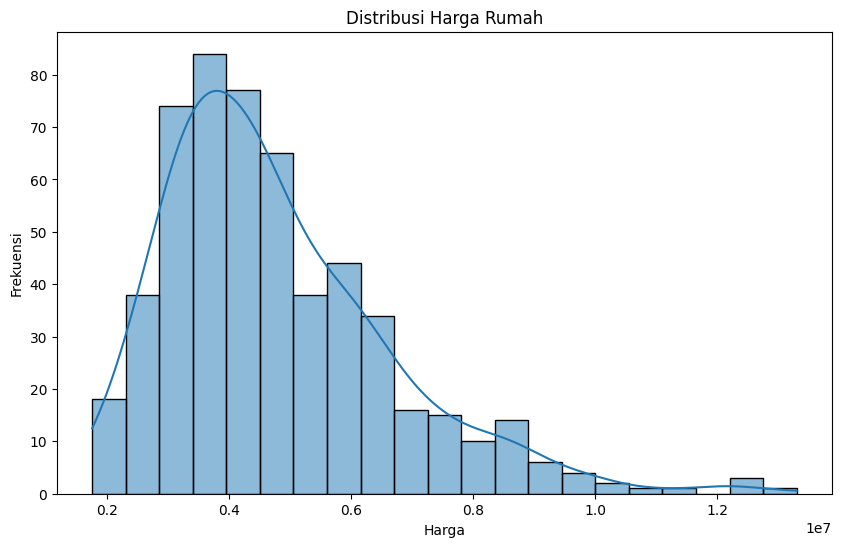

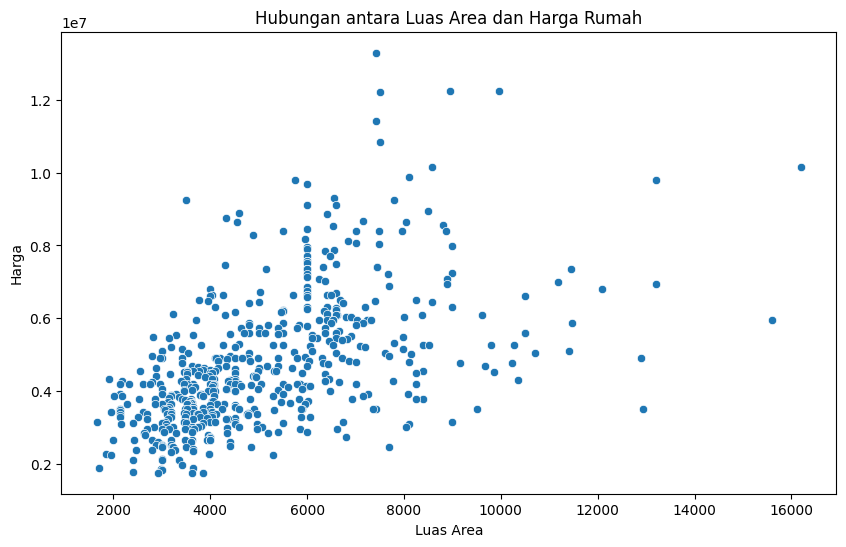

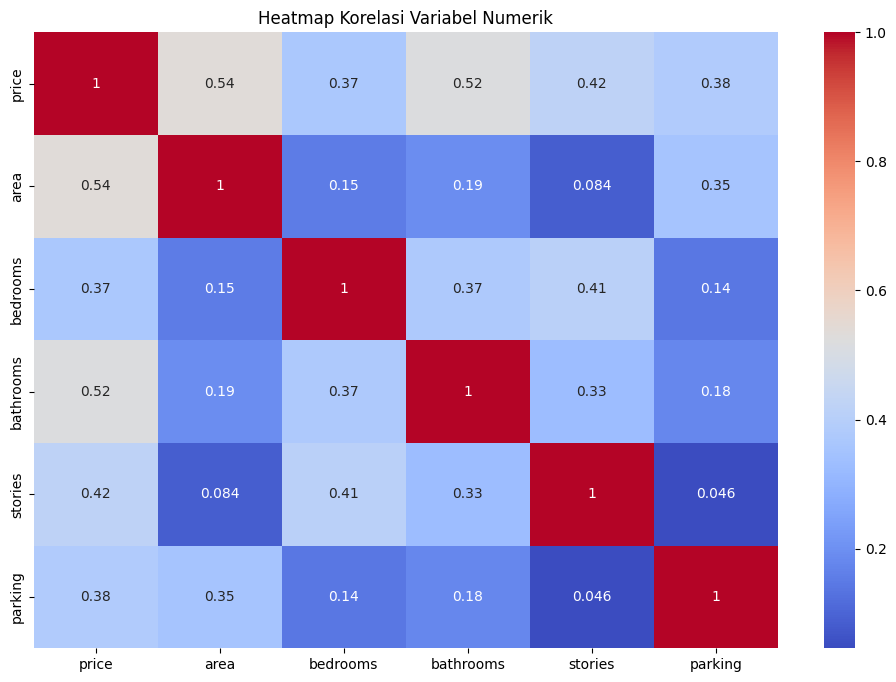

In [65]:
# Visualisasi distribusi harga rumah
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribusi Harga Rumah')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.savefig('distribusi_harga.png')
plt.show()

# Visualisasi korelasi antara area dan harga
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Hubungan antara Luas Area dan Harga Rumah')
plt.xlabel('Luas Area')
plt.ylabel('Harga')
plt.savefig('area_vs_price.png')
plt.show()

# Heatmap korelasi
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Variabel Numerik')
plt.savefig('heatmap_korelasi.png')
plt.show()

### 2. Teknik Data Preparation

#### Data Preparation dengan One Hot Encoding

In [68]:
# Mengidentifikasi kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Kolom kategorikal yang akan di-encode:", categorical_cols)

# Membuat salinan dataframe
df_encoded = df.copy()

# Membuat objek OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Melakukan One Hot Encoding
encoded_data = encoder.fit_transform(df[categorical_cols])

# Mengambil nama fitur hasil encoding
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Membuat DataFrame untuk hasil encoding
encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names, index=df.index)

# Menggabungkan dataframe asli dengan hasil encoding
df_encoded = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

# Menampilkan hasil
print("\nHasil One Hot Encoding:")
print(df_encoded.head())
print("\nBentuk dataframe sebelum encoding:", df.shape)
print("Bentuk dataframe setelah encoding:", df_encoded.shape)

Kolom kategorikal yang akan di-encode: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

Hasil One Hot Encoding:
      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2           1.0   
1  12250000  8960         4          4        4        3           1.0   
2  12250000  9960         3          2        2        2           1.0   
3  12215000  7500         4          2        2        3           1.0   
4  11410000  7420         4          1        2        2           1.0   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0            0.0           0.0                  0.0                  1.0   
1            0.0           0.0                  0.0                  1.0   
2            0.0           1.0                  0.0                  0.0   
3            0.0           1.0                  0.0                  1.0   
4  

#### Data Preparation dengan Outlier Removal

Ukuran dataset sebelum penghapusan outlier: (545, 13)


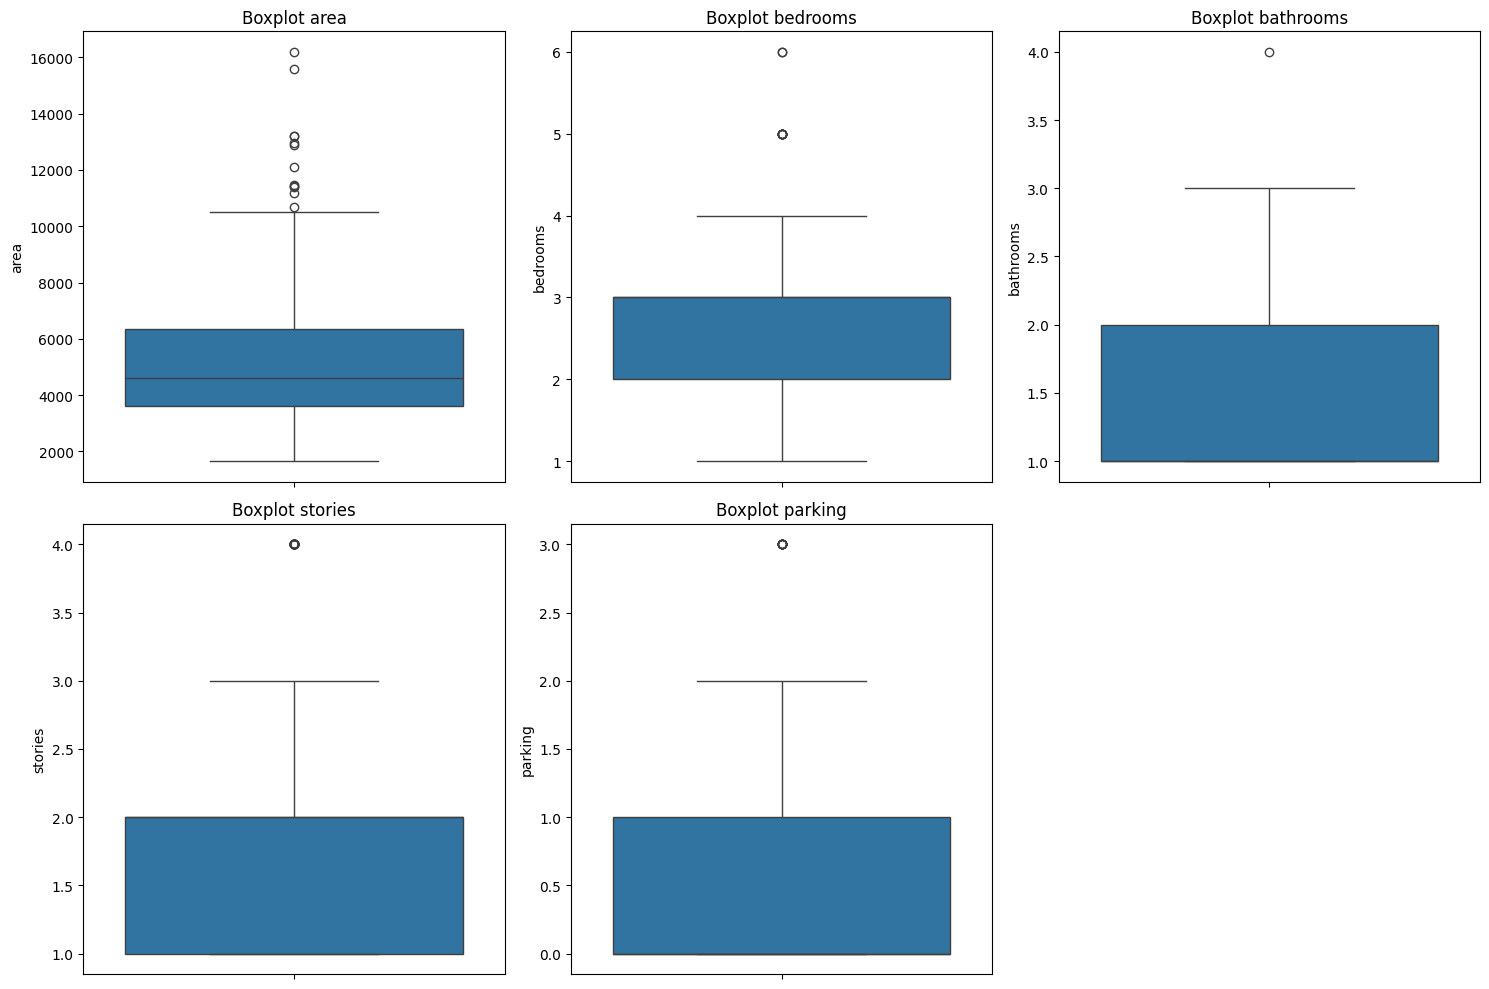


Ukuran dataset setelah penghapusan outlier: (538, 13)
Jumlah data yang dihapus: 7


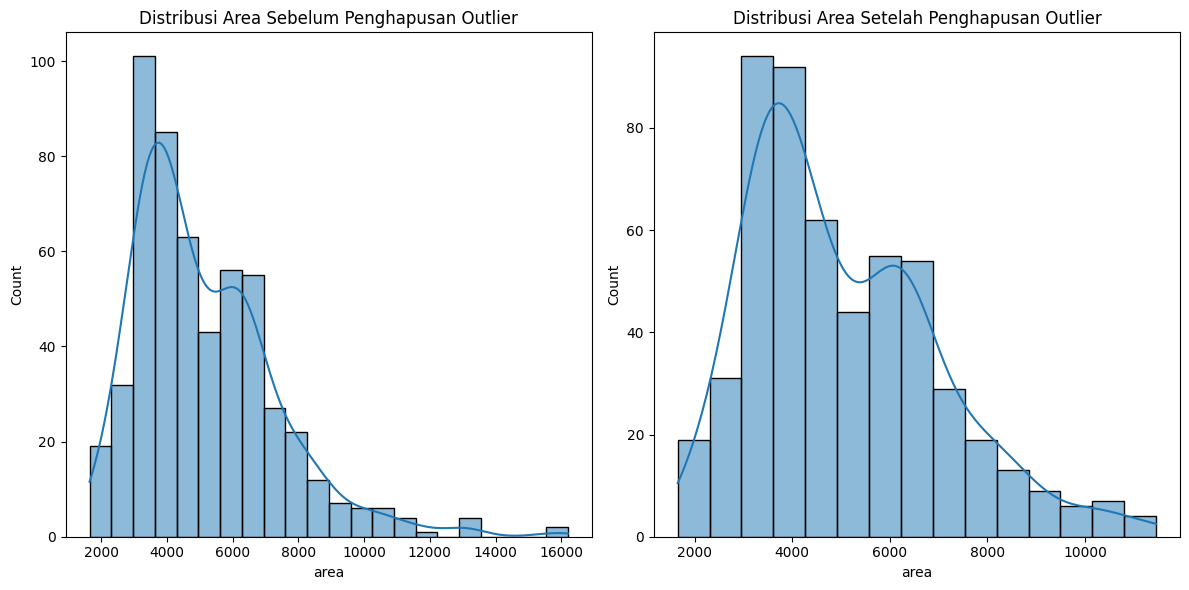

In [67]:
# Menyimpan ukuran dataset sebelum penghapusan outlier
print("Ukuran dataset sebelum penghapusan outlier:", df.shape)

# Mengidentifikasi kolom numerik untuk deteksi outlier
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('price')  # Mengeluarkan price sebagai target variabel

# Visualisasi outlier menggunakan boxplot
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.savefig('boxplot_outlier.png')
plt.show()

# Membuat dataframe untuk pengolahan outlier
df_no_outliers = df.copy()

# Fungsi untuk mendeteksi outlier dengan metode Z-Score
def remove_outliers_zscore(df, col, threshold=3):
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
    return df[z_scores < threshold]

# Menghapus outlier dari kolom 'area'
df_no_outliers = remove_outliers_zscore(df_no_outliers, 'area')

# Menampilkan hasil
print("\nUkuran dataset setelah penghapusan outlier:", df_no_outliers.shape)
print(f"Jumlah data yang dihapus: {df.shape[0] - df_no_outliers.shape[0]}")

# Visualisasi perbandingan distribusi sebelum dan sesudah penghapusan outlier
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['area'], kde=True)
plt.title('Distribusi Area Sebelum Penghapusan Outlier')

plt.subplot(1, 2, 2)
sns.histplot(df_no_outliers['area'], kde=True)
plt.title('Distribusi Area Setelah Penghapusan Outlier')

plt.tight_layout()
plt.savefig('before_after_outlier_removal.png')
plt.show()

#### Data Preparation dengan Normalization


Hasil Normalisasi (MinMaxScaler):
       area  bedrooms  bathrooms   stories   parking
0  0.588175       0.6   0.333333  0.666667  0.666667
1  0.745158       0.6   1.000000  1.000000  1.000000
2  0.847095       0.4   0.333333  0.333333  0.666667
3  0.596330       0.6   0.333333  0.333333  1.000000
4  0.588175       0.6   0.000000  0.333333  0.666667

Statistik deskriptif setelah normalisasi:
             area    bedrooms   bathrooms     stories     parking
count  538.000000  538.000000  538.000000  538.000000  538.000000
mean     0.345450    0.392193    0.094796    0.270136    0.228625
std      0.197972    0.147020    0.166194    0.290074    0.286214
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.196075    0.200000    0.000000    0.000000    0.000000
50%      0.291539    0.400000    0.000000    0.333333    0.000000
75%      0.479867    0.400000    0.333333    0.333333    0.333333
max      1.000000    1.000000    1.000000    1.000000    1.000000


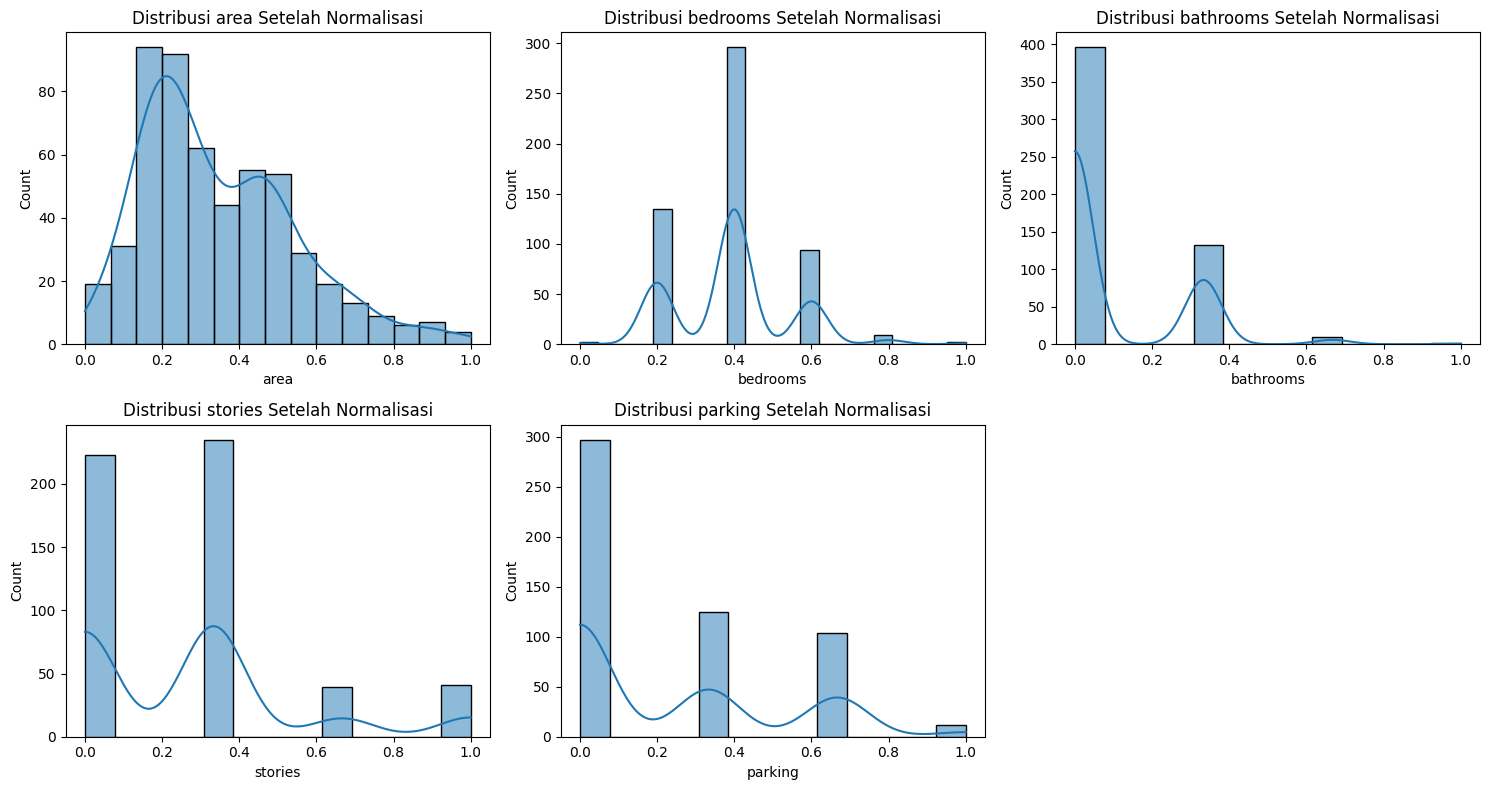

In [69]:
# Membuat dataframe untuk normalisasi
df_normalized = df_no_outliers.copy()

# Mengidentifikasi fitur numerik untuk normalisasi
numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Membuat dan mengaplikasikan MinMaxScaler
min_max_scaler = MinMaxScaler()
df_normalized[numeric_features] = min_max_scaler.fit_transform(df_normalized[numeric_features])

# Menampilkan hasil
print("\nHasil Normalisasi (MinMaxScaler):")
print(df_normalized[numeric_features].head())
print("\nStatistik deskriptif setelah normalisasi:")
print(df_normalized[numeric_features].describe())

# Visualisasi data setelah normalisasi
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_normalized[col], kde=True)
    plt.title(f'Distribusi {col} Setelah Normalisasi')
plt.tight_layout()
plt.savefig('after_normalization.png')
plt.show()

#### Data Preparation dengan Standarization


Hasil Standardisasi (StandardScaler):
       area  bedrooms  bathrooms   stories   parking
0  1.227196  1.414773   1.436637  1.368271  1.531894
1  2.020887  1.414773   5.451758  2.518474  2.697606
2  2.536271  0.053149   1.436637  0.218068  1.531894
3  1.268427  1.414773   1.436637  0.218068  2.697606
4  1.227196  1.414773  -0.570923  0.218068  1.531894

Statistik deskriptif setelah standardisasi:
               area      bedrooms     bathrooms       stories       parking
count  5.380000e+02  5.380000e+02  5.380000e+02  5.380000e+02  5.380000e+02
mean   1.056569e-16 -2.377281e-16  7.924268e-17  7.924268e-17  2.641423e-17
std    1.000931e+00  1.000931e+00  1.000931e+00  1.000931e+00  1.000931e+00
min   -1.746567e+00 -2.670099e+00 -5.709233e-01 -9.321348e-01 -7.995314e-01
25%   -7.552267e-01 -1.308475e+00 -5.709233e-01 -9.321348e-01 -7.995314e-01
50%   -2.725699e-01  5.314889e-02 -5.709233e-01  2.180682e-01 -7.995314e-01
75%    6.796013e-01  5.314889e-02  1.436637e+00  2.180682e-01  3.6

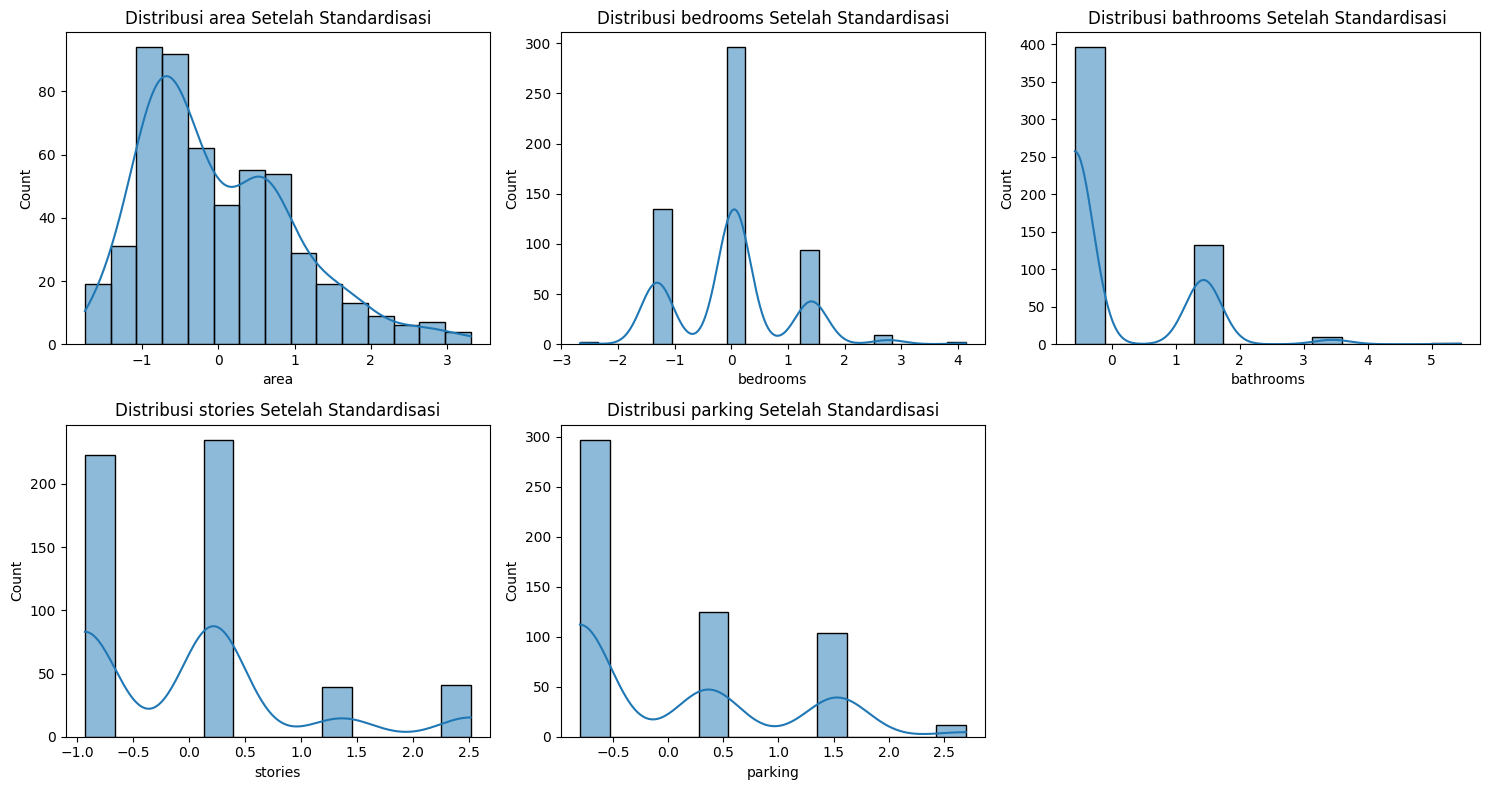

In [70]:
# Membuat dataframe untuk standardisasi
df_standardized = df_no_outliers.copy()

# Membuat dan mengaplikasikan StandardScaler
standard_scaler = StandardScaler()
df_standardized[numeric_features] = standard_scaler.fit_transform(df_standardized[numeric_features])

# Menampilkan hasil
print("\nHasil Standardisasi (StandardScaler):")
print(df_standardized[numeric_features].head())
print("\nStatistik deskriptif setelah standardisasi:")
print(df_standardized[numeric_features].describe())

# Visualisasi data setelah standardisasi
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_standardized[col], kde=True)
    plt.title(f'Distribusi {col} Setelah Standardisasi')
plt.tight_layout()
plt.savefig('after_standardization.png')
plt.show()

#### Pembuatan DataSet

In [72]:
# Menggunakan dataframe hasil one hot encoding untuk pembuatan dataset
X = df_encoded.drop('price', axis=1)  # Fitur-fitur
y = df_encoded['price']  # Target (harga)

# Membagi data menjadi training set dan test set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran dataset
print("\nPembuatan Dataset (Train-Test Split):")
print(f"Ukuran data sebelum split: {X.shape}")
print(f"Ukuran data training: {X_train.shape}")
print(f"Ukuran data testing: {X_test.shape}")

# Demo model sederhana dengan DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluasi performa model pada data test
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"\nR² Score pada data training: {train_score:.4f}")
print(f"R² Score pada data testing: {test_score:.4f}")

# Cross-validation untuk evaluasi model yang lebih robust
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"\nCross-validation scores (5-fold): {cv_scores}")
print(f"Mean R² dari cross-validation: {cv_scores.mean():.4f}")
print(f"Standard deviation R² dari cross-validation: {cv_scores.std():.4f}")


Pembuatan Dataset (Train-Test Split):
Ukuran data sebelum split: (545, 13)
Ukuran data training: (436, 13)
Ukuran data testing: (109, 13)

R² Score pada data training: 0.9985
R² Score pada data testing: 0.4771

Cross-validation scores (5-fold): [ -3.30371364 -19.89960357 -48.83456426 -46.67536428 -15.77618669]
Mean R² dari cross-validation: -26.8979
Standard deviation R² dari cross-validation: 17.8982
